<a href="https://colab.research.google.com/github/greyhound101/IEEE-CIS-Fraud/blob/master/DeepFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
from tensorflow.keras.models import *
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *

def antirectifier(x):
    b = K.square(K.sum(x, axis=1))
    a = K.sum(K.square(x), axis=1)
    return 0.5*(b-a)
def new(x):
  return K.sum(x,axis=1)
def get_model(vocab,num_cols=64,emb_num=64,drop_rate=0.1):
  inp=Input((num_cols,))
  emb=Embedding(vocab,emb_num,input_length=num_cols)(inp)
  emb1=Embedding(vocab,1,input_length=num_cols)(inp)
  out1=Lambda(antirectifier)(emb)
  # out1=Reshape((1,-1))(out1)
  out1=Lambda(new)(out1)
  out1=Flatten()(out1)
  emb=Flatten()(emb)
  x=Dense(30,activation='relu')(emb)
  x=Dropout(drop_rate)(x)
  x=Dense(20,activation='relu')(x)
  x=Dropout(drop_rate)(x)
  x=Dense(10,activation='relu')(x)
  x=Dropout(drop_rate)(x)
  out2=Dense(1,activation='relu')(x)
  out3=Lambda(new)(emb1)
  out=Add()([out1,out2,out3])
  out=Dense(1,activation='sigmoid')(out)
  return Model(inputs=inp,outputs=out)


In [219]:
import pandas as pd
trn=pd.read_csv('train.csv')
tst=pd.read_csv('test.csv')
trn.head()

,1\t7966771467489568765\t17749416933507762\t3191210455834396616\t1195170026701657\t1748842568874147415\t7675791131320410553\t4701804190580882537\t11082981552768544968\t16217093288348224708\t16756559817343139\t2266126940897637389\t4953446123401968244\t644722993661852468\t7382309247449216475\t4800284767280288085\t2358762240877002707\t16672487388485808195\t8691739813819121124\t3186706665858369067\t11411006900043110081\t7313421385815342575\t3749260986050395326\t6501986202429652599\t575895605287572387\t5152412181489518868\t4800337544597996229\t10796976340558983233\t1270396324967536174\t6591038790241112642\t856756236757155\t339364437345798\t568264607241118\t908188825634590\t429431630298059
0,0\t9264795692916251211\t17749416933507762\t922...
1,1\t6032537517142277250\t17749416933507762\t317...
2,1\t11353376799080416039\t4238617678860930\t182...
3,0\t1743897991246861227\t17749416933507762\t125...
4,0\t7943568968327044871\t8742217430409874\t1686...


In [220]:
def seperate(data):
  return [x.strip() for x in data.split('\t')]
def get_data(df):
  ls=[]
  for col in df.iterrows():
    ls.append(seperate(col[1].values[0]))
  df=pd.DataFrame(ls)
  df['target']=df[0]
  df=df.drop([0],1)
  return df 

In [221]:
trn=get_data(trn)
tst=get_data(tst)

In [222]:
trn.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,target
0,9264795692916251211,17749416933507762,9229501815949515510,628921522293786,4803369931892984081,16241372260694892437,17017790176924614205,415417486762667221,14867891937923930796,23793434429138364,15261016165126843346,5499204132933697660,16716329115520036567,1350101063678882116,4800284767280288085,11080468316192528155,16679713878894741852,11087125401491548601,875143700202033517,16250358715717120097,3656351153896375733,9787552346165514220,1083486246900023064,575869217003858363,15767895280082591605,4800337544597996229,12102744253729441357,1270396324967536174,6025705787666031645,119486671783125,235005116679171,529074975193343,731879291716187,864276907133049,0
1,6032537517142277250,17749416933507762,3174603432057537224,628921522293786,5428286124796443771,14896328297495858915,17564601500486410515,16670240050289096538,17930366338276441110,81495801950891913,673695614319195948,12028040008890954518,977986703959698797,17978782824242820437,4800284767280288085,7349030558823697000,10121673841156556448,9763705372049071591,11214842620355826970,16886214233881594445,17576631256606067504,3732653962273535934,3979966010849580923,575869217003858363,14310698945586692624,6361388155859829633,10806040338588005620,1270396324967536174,17416673177737220282,856756236757155,745549218612923,408053996174176,334635160341753,272148152284349,1
2,11353376799080416039,4238617678860930,18269028913649194348,907097971301342,14014101986949434244,748707057736971340,15944691019466537207,17405961764024501147,14283456414721736119,63762882224135242,13899000186153958641,9288668802201931409,7228169649571912591,9017685295785309970,4800284767280288085,13902391928612791624,6324127934709474318,4145928097768020448,11407014228976572220,16448028045499027925,2365350778241375947,393846165115320978,13208797126556884182,575856022862001351,15355984281871228345,2018729239106170188,2313329042447869162,1270396324967536174,1006032873178224866,135844232036829,159755967140145,890474191840527,345924291875416,025051184088077,1
3,1743897991246861227,17749416933507762,12586678054235298400,1198468562165910,3779735882784632009,5234119855681287344,11222808646785911398,13033943990468586514,12916273704427693735,75866306556423029,877134970906123204,11127032423927609033,17016334199383581529,12532032102536605552,4800284767280288085,5169495287786573707,931898075675386898,10479837776551674665,4891344084715341601,2304851813700097438,14538277108890554207,13144728584451297110,17956936932366112270,575889008216643881,354121824121434222,4800337544597996229,4500337958371712532,4500339057899164785,16753613297165320427,669791400686431,745549218612923,176011515325929,925314835575112,185878040456079,0
4,7943568968327044871,8742217430409874,1686509002640973550,1195170026701657,12087678143338238624,11739737107598948534,18331482272516878321,6396638695262007524,17236905285475233855,100073150926031307,4541130078142807932,6920782239357538930,1726608638781015771,13552695124099240846,4800284767280288085,17973294198525768404,3598418071329114427,8087577457696213508,208043143427997636,4399888481017311225,12401921617346203643,2253566732360070148,5431135544566740004,575882411145715375,11391688690801672626,4800337544597996229,2294066729987437183,1270396324967536174,7805164516435453305,378125837952427,982585604194268,165459705250394,404667797776291,864276907133049,0


In [223]:
tst.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,target
0,16079172393263301046,8742217430409874,13262097052294154798,1476645011173466,11689984816104565608,8695915407637459669,10024613647868752158,4843048554820633050,10684523495627192440,40963408481918713,17235363856461728827,14272001435478762300,4900284262846565233,10276064895630968203,4800284767280288085,12254462047704270656,8277837964030216188,7119481761846956861,10669467109003206827,7287239429272716720,5951615760517414242,13829154777718284100,13472798661699153898,575859321397465604,6005780254104577405,4800337544597996229,4500337958371712532,4500339057899164785,6072617953455588216,215508954096898,822174508226440,165459705250394,685662481743472,751688284622869,1
1,15234869980079659220,4238617678860930,8753894869642857720,1185274420308898,18180374893564914156,12374730524281030092,13005610674291119149,12313104165409384658,852498145738526798,91910376376348846,14020559514728678198,5524562321876837085,1279292752215150303,723663347172576483,4800284767280288085,8626121000977257898,5633585662236863658,11892895922358370089,4069108406965926397,2394809229218831385,20205726985404748,9325456194818535966,6095275750499933348,575842828720144339,3437090650700402881,4800337544597996229,1870405397462141141,1270396324967536174,14998938554630775539,215508954096898,253152231094720,529074975193343,908188825634590,363760148080611,1
2,14202970155985878789,8742217430409874,14366365165596993928,907097971301342,5664107520413194959,11296260757633750489,16876831689014807334,12148820636556112969,13425503954444434932,63762882224135242,3417886755823021651,8758849044395966896,17016334199383581529,10962894867357313442,4800284767280288085,13852145064702572189,6007785197557531952,12766117696729259851,8288949699145680200,504086513240842144,12969139873711262097,14933422895316090526,18143297560420324984,575849425791072845,4508856630182852380,4800337544597996229,4500337958371712532,4500339057899164785,12075527948837869447,856756236757155,401812355887609,820036361564515,640342884010885,929335532750735,1
3,17866253463828179240,17749416933507762,8394720704296041971,628921522293786,3288620503872194947,2697409758385172772,10565301793054085141,11674480325417624091,12083105878503286666,25482284335969218,6298863395129415303,9752985771996500489,9173697780360696747,15569682263853358887,3997903255750673976,8696411593863841595,11682115446492738231,5312290975383247998,5922171021703334020,15386551486504259354,6971819615520640708,8952771230217073385,9785629302097045151,575869217003858363,2981121795536498639,3997956033068382120,18414719298444158980,1270396324967536174,2843956357953951161,040727184364772,982585604194268,892746428809900,002662108935290,646130742645121,0
4,12389182165078420806,17749416933507762,4809065950293895233,344148002357724,12389270122979633750,8148755996797559297,18251465311260153880,17788642385992662205,7110801472092688735,40118983528503286,10689613245185531563,5714529609964809387,8502723946216931249,6859380675632756027,10379972317942187288,4672296626268125812,17933820653866300279,6045694162974301738,10423225509117861898,7654140876481641506,17379235935153354962,5367116480509893943,1033905968926770813,575862619932929857,16117763254355713592,10380025090964928136,11255459067041783991,1270396324967536174,1072412185141321389,135844232036829,745549218612923,180275579789450,911296502118877,363760148080611,0


In [225]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in range(1,35):
  le.fit(list(set(trn[i]).union(set(tst[i]))))
  trn[i]=le.transform(trn[i])
  tst[i]=le.transform(tst[i])
  

In [226]:
trn.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,target
0,15317,0,15795,50,4045,4892,7580,10431,5152,160,5655,12527,1330,3562,2645,1196,1135,1260,16642,6820,9946,16091,863,8,6274,3577,616,137,13684,3,8,13,20,21,0
1,12175,0,9979,50,4260,3856,8577,6494,8387,362,14333,2067,3277,8422,2645,12864,27,17737,1292,7486,7378,10309,9422,8,4718,4030,125,137,7979,20,17,9,5,3,1
2,1295,1,8500,52,1422,10869,5814,7199,4498,300,4139,16425,2636,16589,2645,3546,2235,11511,1501,7024,8722,10522,3193,4,5849,2755,2479,137,71,5,5,21,7,1,1
3,7127,0,2653,4,3674,9151,929,2974,3109,344,16598,1167,1378,2571,2645,9725,2731,523,12415,9678,4377,3161,6774,14,11034,3577,2730,252,7286,15,17,4,26,2,0
4,14059,2,7094,3,712,1383,9634,12683,7647,0,11915,13951,1412,3622,2645,6136,1726,15975,9407,11899,2268,8888,10707,12,1587,3577,2472,137,15689,8,22,3,9,21,0


In [227]:
tst.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,target
0,5849,2,3407,8,574,11797,18,11193,775,219,7666,4457,2073,257,2645,2295,2551,14852,691,14989,12111,3907,3406,5,13729,3577,2730,252,13735,6,19,3,19,17,1
1,5031,1,15316,0,2894,1892,2393,2266,15698,400,4281,12553,690,14625,2645,14799,2128,2103,11536,9768,8404,15624,11275,0,10933,3577,2382,137,5438,6,9,13,23,6,1
2,4056,2,4562,52,4338,1032,7279,2071,3587,300,10719,15858,1378,958,2645,3515,2184,3008,16117,12633,2814,5051,6887,2,12093,3577,2730,252,2282,20,11,19,18,22,1
3,7560,0,14999,50,3515,7200,441,1654,2279,165,13866,16891,3154,5806,2493,14908,307,12797,13516,5854,13090,15307,15080,8,10460,3370,2368,137,10249,0,22,22,0,13,0
4,2276,0,11581,42,814,11354,9550,7540,14273,216,722,12758,3000,14208,95,9100,1358,13656,424,15366,7184,11891,348,6,6666,127,264,137,840,5,17,5,24,6,0


In [237]:
trn['target']=trn['target'].astype(int)

tst['target']=tst['target'].astype(int)
trn.dtypes

1         int64
2         int64
3         int64
4         int64
5         int64
6         int64
7         int64
8         int64
9         int64
10        int64
11        int64
12        int64
13        int64
14        int64
15        int64
16        int64
17        int64
18        int64
19        int64
20        int64
21        int64
22        int64
23        int64
24        int64
25        int64
26        int64
27        int64
28        int64
29        int64
30        int64
31        int64
32        int64
33        int64
34        int64
target    int64
dtype: object

In [238]:
trn.shape

(14999, 35)

In [252]:
K.clear_session()
mod=get_model(325444,34,64,0.1)
mod.summary()
from tensorflow.keras.optimizers import *
mod.compile(optimizer=Adam(0.001),loss='binary_crossentropy',metrics='accuracy')
loss=mod.fit(trn.drop(['target'],1),trn['target'],epochs=30,validation_data=(tst.drop(['target'],1),tst['target']),batch_size=2048)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 34, 64)       20828416    input_1[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2176)         0           embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           65310       flatten_1[0][0]                  
_______________________________________________________________________________________

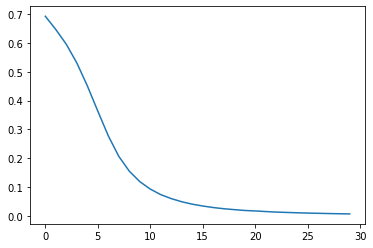

In [253]:
from matplotlib import pyplot as plt
plt.plot(loss.history['loss'])

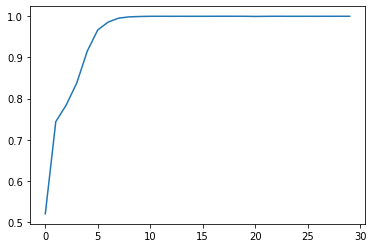

In [254]:
plt.plot(loss.history['accuracy'])

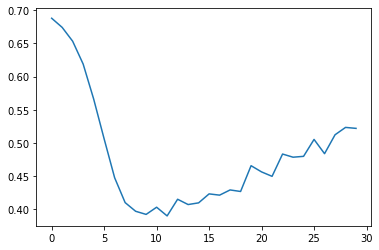

In [255]:
plt.plot(loss.history['val_loss'])

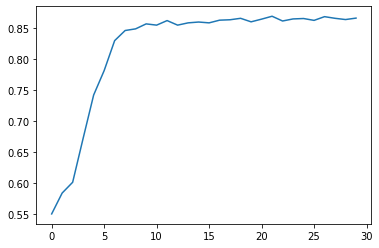

In [256]:
plt.plot(loss.history['val_accuracy'])